<a href="https://colab.research.google.com/github/OmidGhadami95/metaphor-detection-cnn-lstm/blob/main/Preprocessing_Plus_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading data

#Duplication Removal

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/train-1.csv')

# Remove duplicate rows, keeping the first occurrence
df_cleaned_dup = df.drop_duplicates()

# Save the cleaned dataset
df_cleaned_dup.to_csv('train-1_cleaned_dup.csv', index=False)

print("Total rows in original dataset:", len(df))
print("Total rows in cleaned dataset:", len(df_cleaned_dup))
print("Number of rows removed:", len(df) - len(df_cleaned_dup))

Total rows in original dataset: 1870
Total rows in cleaned dataset: 1865
Number of rows removed: 5


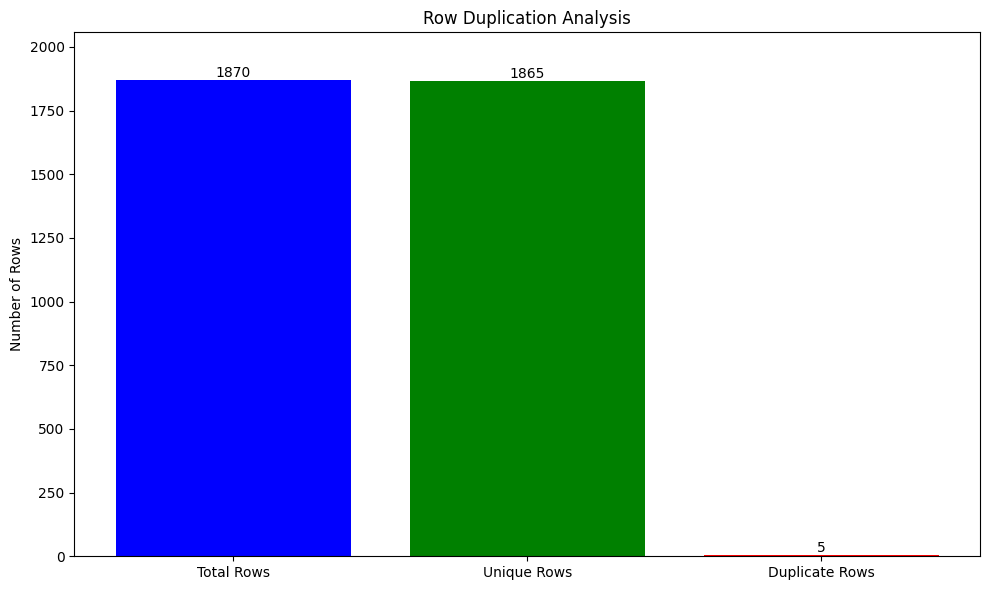

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Total Rows', 'Unique Rows', 'Duplicate Rows']
values = [len(df), len(df_cleaned_dup), len(df) - len(df_cleaned_dup)]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['blue', 'green', 'red'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}', ha='center', va='bottom')

# Customize the chart
plt.title('Row Duplication Analysis')
plt.ylabel('Number of Rows')
plt.ylim(0, max(values) * 1.1)  # Set y-axis limit to 110% of max value

# Display the chart
plt.tight_layout()
plt.show()


#Punctuation Removal

In [ ]:
import string
# Assuming df_cleaned_dup is your DataFrame after removing duplicates
# If not, you may need to load it first:

# Remove all punctuation from the 'text' column
df_cleaned_dup['text'] = df_cleaned_dup['text'].str.translate(str.maketrans('', '', string.punctuation))

# Display the first few rows of the modified 'text' column
print(df_cleaned_dup['text'].head())

# Save the modified DataFrame back to a CSV file if needed
df_cleaned_dup.to_csv('train-1_cleaned_pun.csv', index=False)
df_cleaned_pun = pd.read_csv('/content/train-1_cleaned_pun.csv')

0    Hey  Karen  I was told that on the day of diag...
1    Hi Ladies  my last chemo was Feb 1709  rads fi...
2    I have just come form my consult with a lovely...
3    I also still question taking Tamox for stage 1...
4    Just checking in to say hello ladies  I had a ...
Name: text, dtype: object


<ipython-input-4-9966f7d97755>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_dup['text'] = df_cleaned_dup['text'].str.translate(str.maketrans('', '', string.punctuation))


In [ ]:
# Read the CSV files
df_dup = pd.read_csv('train-1_cleaned_dup.csv')
df_pun = pd.read_csv('train-1_cleaned_pun.csv')

# Calculate average word count for each file
avg_words_dup = df_dup['text'].str.split().str.len().mean()
avg_words_pun = df_pun['text'].str.split().str.len().mean()

# Calculate total word count for each file
total_words_dup = df_dup['text'].str.split().str.len().sum()
total_words_pun = df_pun['text'].str.split().str.len().sum()

# Calculate the difference in total word count
word_count_difference = total_words_dup - total_words_pun

print(f"Average words in train-1_cleaned_dup.csv: {avg_words_dup:.2f}")
print(f"Average words in train-1_cleaned_pun.csv: {avg_words_pun:.2f}")
print(f"Total words in train-1_cleaned_dup.csv: {total_words_dup}")
print(f"Total words in train-1_cleaned_pun.csv: {total_words_pun}")
print(f"Difference in total word count: {word_count_difference}")


Average words in train-1_cleaned_dup.csv: 205.33
Average words in train-1_cleaned_pun.csv: 183.90
Total words in train-1_cleaned_dup.csv: 382947
Total words in train-1_cleaned_pun.csv: 342970
Difference in total word count: 39977


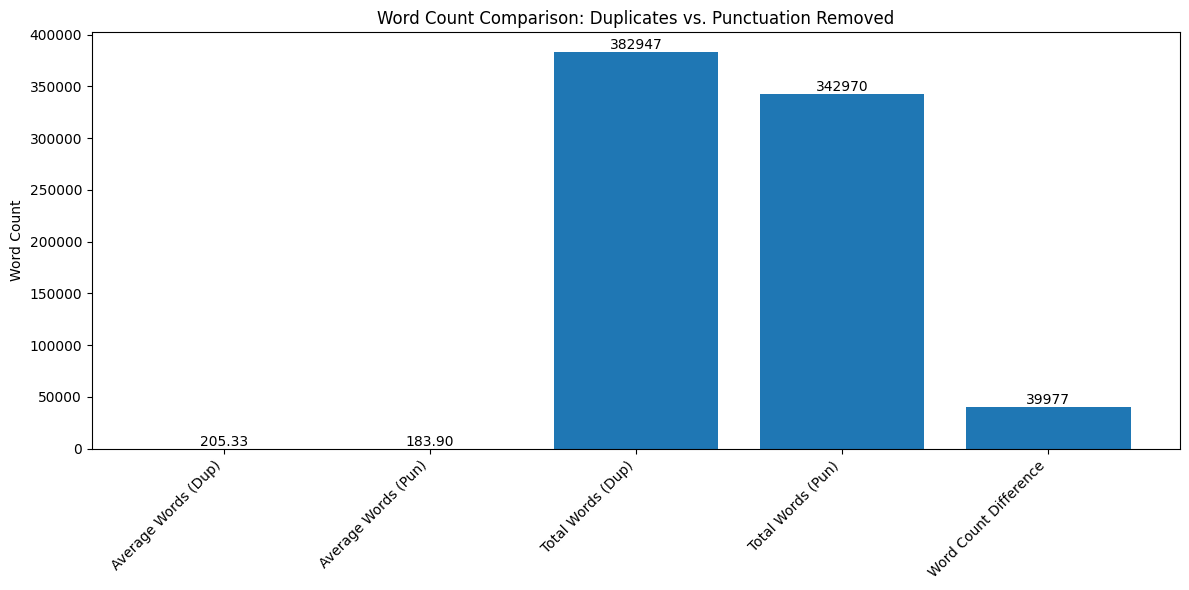

In [ ]:
# Read the CSV files
df_dup = pd.read_csv('train-1_cleaned_dup.csv')
df_pun = pd.read_csv('train-1_cleaned_pun.csv')

# Calculate average word count for each file
avg_words_dup = df_dup['text'].str.split().str.len().mean()
avg_words_pun = df_pun['text'].str.split().str.len().mean()

# Calculate total word count for each file
total_words_dup = df_dup['text'].str.split().str.len().sum()
total_words_pun = df_pun['text'].str.split().str.len().sum()

# Calculate the difference in total word count
word_count_difference = total_words_dup - total_words_pun

# Data for plotting
categories = ['Average Words (Dup)', 'Average Words (Pun)', 'Total Words (Dup)', 'Total Words (Pun)', 'Word Count Difference']
values = [avg_words_dup, avg_words_pun, total_words_dup, total_words_pun, word_count_difference]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, values)

# Customize the chart
plt.title('Word Count Comparison: Duplicates vs. Punctuation Removed')
plt.ylabel('Word Count')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}' if height < 1000 else f'{height:.0f}',
             ha='center', va='bottom')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


#LowerCase

In [ ]:
# Read the CSV file
df_pun = pd.read_csv('train-1_cleaned_pun.csv')

# Convert the 'text' column to lowercase
df_pun['text'] = df_pun['text'].str.lower()

# Save the modified DataFrame back to a CSV file
df_pun.to_csv('train-1_cleaned_lc.csv', index=False)

# Display the first few rows to verify the change
print(df_pun['text'].head())

# Calculate and print the word counts again
avg_words_pun = df_pun['text'].str.split().str.len().mean()
total_words_pun = df_pun['text'].str.split().str.len().sum()

print(f"\nAfter converting to lowercase:")
print(f"Average words in train-1_cleaned_lc.csv: {avg_words_pun:.2f}")
print(f"Total words in train-1_cleaned_lc.csv: {total_words_pun}")

0    hey  karen  i was told that on the day of diag...
1    hi ladies  my last chemo was feb 1709  rads fi...
2    i have just come form my consult with a lovely...
3    i also still question taking tamox for stage 1...
4    just checking in to say hello ladies  i had a ...
Name: text, dtype: object

After converting to lowercase:
Average words in train-1_cleaned_lc.csv: 183.90
Total words in train-1_cleaned_lc.csv: 342970


#Stop Word Removal

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_lc.csv')

# Define a list of common English stop words
stop_words = set(['a', 'an', 'the'])

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply stop word removal to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

# Save the modified DataFrame back to a CSV file
df.to_csv('train-1_cleaned_nostop.csv', index=False)

# Display the first few rows to verify the change
print(df['text'].head())

# Calculate and print the word counts
avg_words = df['text'].str.split().str.len().mean()
total_words = df['text'].str.split().str.len().sum()

print(f"\nAfter removing stop words:")
print(f"Average words per row: {avg_words:.2f}")
print(f"Total words: {total_words}")

0    hey karen i was told that on day of diagnosis ...
1    hi ladies my last chemo was feb 1709 rads fini...
2    i have just come form my consult with lovely p...
3    i also still question taking tamox for stage 1...
4    just checking in to say hello ladies i had lon...
Name: text, dtype: object

After removing stop words:
Average words per row: 173.16
Total words: 322936


#URL and HTML Removal

In [ ]:
import re

# Read the CSV file
df = pd.read_csv('train-1_cleaned_nostop.csv')

# Function to remove URLs and HTML codes
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML codes
    text = re.sub(r'<.*?>', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

# Save the cleaned DataFrame back to a CSV file
df.to_csv('train-1_cleaned_nourl.csv', index=False)

# Display the first few rows to verify the changes
print(df['text'].head())

# Calculate and print the word counts
avg_words = df['text'].str.split().str.len().mean()
total_words = df['text'].str.split().str.len().sum()

print(f"\nAfter removing URLs and HTML codes:")
print(f"Average words per row: {avg_words:.2f}")
print(f"Total words: {total_words}")


0    hey karen i was told that on day of diagnosis ...
1    hi ladies my last chemo was feb 1709 rads fini...
2    i have just come form my consult with lovely p...
3    i also still question taking tamox for stage 1...
4    just checking in to say hello ladies i had lon...
Name: text, dtype: object

After removing URLs and HTML codes:
Average words per row: 173.14
Total words: 322913


#Distribution In Terms Of The First Column

<ipython-input-47-ce873a1520ec>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        road
1       light
2       light
3        ride
4       light
        ...  
1860     ride
1861     ride
1862     road
1863    train
1864    light
Name: metaphorID, Length: 1865, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0] = df.iloc[:, 0].map(mapping)


  metaphorID  label                                               text
0       road   True  hey karen i was told that on day of diagnosis ...
1      light  False  hi ladies my last chemo was feb 1709 rads fini...
2      light  False  i have just come form my consult with lovely p...
3       ride  False  i also still question taking tamox for stage 1...
4      light  False  just checking in to say hello ladies i had lon...

Value counts in the modified first column:
metaphorID
road      728
light     481
ride      293
boat      236
train      97
spice      16
candle     14
Name: count, dtype: int64


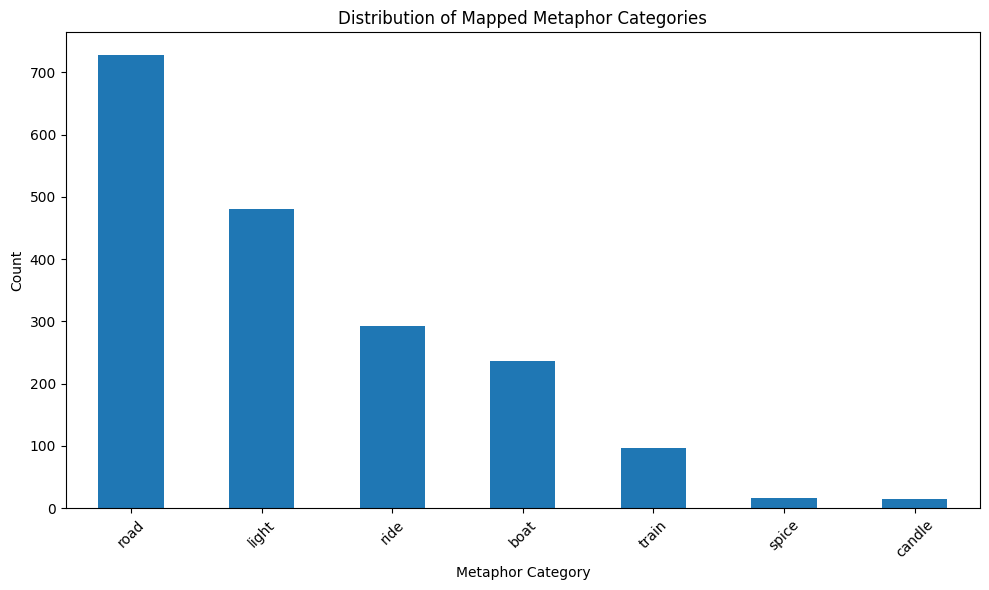

<Figure size 640x480 with 0 Axes>

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_nourl.csv')

# Define the mapping for the first column
mapping = {
    0: 'road',
    1: 'candle',
    2: 'light',
    3: 'spice',
    4: 'ride',
    5: 'train',
    6: 'boat'
}

# Apply the mapping to the first column
df.iloc[:, 0] = df.iloc[:, 0].map(mapping)

# Save the modified DataFrame to a new CSV file
df.to_csv('train-1_cleaned_mapped.csv', index=False)

# Display the first few rows of the modified DataFrame
print(df.head())

# Print some statistics
print("\nValue counts in the modified first column:")
print(df.iloc[:, 0].value_counts())


# Read the CSV file
df = pd.read_csv('train-1_cleaned_mapped.csv')

# Get the value counts of the first column (metaphor categories)
value_counts = df.iloc[:, 0].value_counts()

# Plot the value counts as a bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')

# Add labels and title
plt.title('Distribution of Mapped Metaphor Categories')
plt.xlabel('Metaphor Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('metaphorID_distribution.png')

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_mapped.csv')

# Get unique values in the first column
unique_categories = df.iloc[:, 0].unique()

# Dictionary to store results for each category
category_results = {}

# Check for each unique category
for category in unique_categories:
    # Filter rows where the first column is the current category
    category_rows = df[df.iloc[:, 0] == category]

    # Check which rows do NOT have the category in the text (case-insensitive)
    rows_without_category = category_rows[~category_rows.iloc[:, 2].str.lower().str.contains(category.lower())]

    # Store the results
    category_results[category] = {
        'total_rows': len(category_rows),
        'rows_without_category': len(rows_without_category),
        'percentage': (len(rows_without_category) / len(category_rows)) * 100 if len(category_rows) > 0 else 0,
        'example_rows': rows_without_category
    }

# Print detailed results
print("Detailed Results:")
for category, results in category_results.items():
    print(f"\nCategory: {category}")
    print(f"Total rows: {results['total_rows']}")
    print(f"Rows without category word in their third column: {results['rows_without_category']}")

    # If there are rows without the category, print some examples
    if results['rows_without_category'] > 0:
        print("\nExample rows without category:")
        print(results['example_rows'])


Detailed Results:

Category: road
Total rows: 728
Rows without category word in their third column: 0

Category: light
Total rows: 481
Rows without category word in their third column: 0

Category: ride
Total rows: 293
Rows without category word in their third column: 0

Category: boat
Total rows: 236
Rows without category word in their third column: 0

Category: train
Total rows: 97
Rows without category word in their third column: 0

Category: candle
Total rows: 14
Rows without category word in their third column: 0

Category: spice
Total rows: 16
Rows without category word in their third column: 0


#Handling Imbalanced Dataset

Label Counts:
label
True     1428
False     437
Name: count, dtype: int64


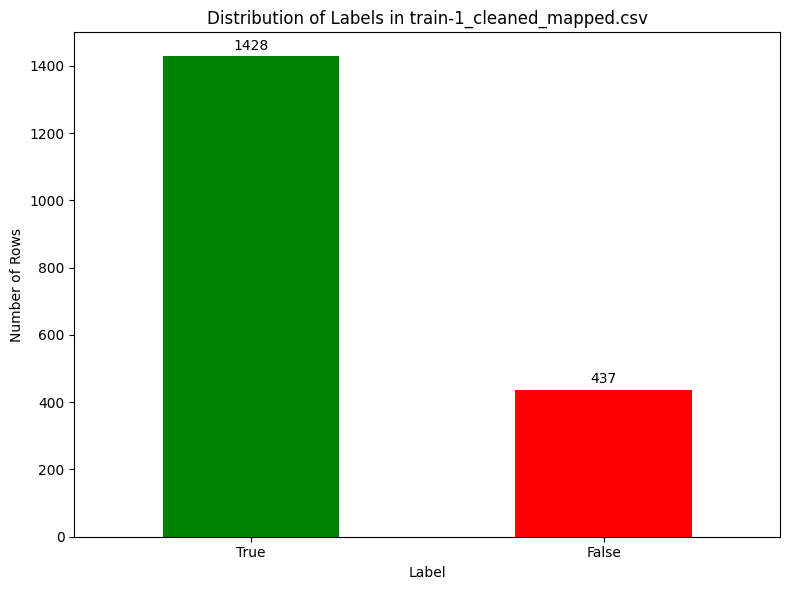

<Figure size 640x480 with 0 Axes>

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_mapped.csv')

# Count the number of rows with 'True' and 'False' in the second column
label_counts = df['label'].value_counts()

# Print the counts for 'True' and 'False'
print("Label Counts:")
print(label_counts)

# Create a bar plot for the label distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Labels in train-1_cleaned_mapped.csv')
plt.xlabel('Label')
plt.ylabel('Number of Rows')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(label_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()
plt.savefig('class_distribution_BeforeBalancing.png')

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_mapped.csv')

# Filter rows where the second column ('label') is False
false_rows = df[df['label'] == False]

# Duplicate these rows 3 times (i.e., 3 additional copies)
duplicated_false_rows = pd.concat([false_rows] * 2, ignore_index=True)

# Combine the original DataFrame with the duplicated rows
final_df = pd.concat([df, duplicated_false_rows], ignore_index=True)

# Save the new DataFrame to a CSV file
final_df.to_csv('train-1_cleaned_balanced.csv', index=False)

print("New CSV file 'train-1_cleaned_balanced.csv' has been created.")
print(f"Total rows in the new file: {len(final_df)}")

New CSV file 'train-1_cleaned_balanced.csv' has been created.
Total rows in the new file: 2739


Label Counts:
label
True     1428
False    1311
Name: count, dtype: int64


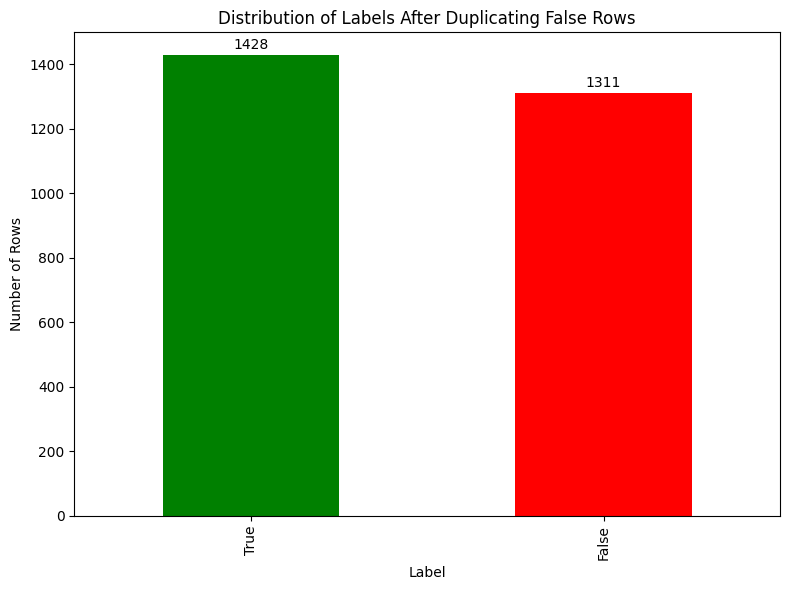

<Figure size 640x480 with 0 Axes>

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_balanced.csv')

# Count the number of rows with 'True' and 'False' in the second column
label_counts = df['label'].value_counts()

# Print the counts for 'True' and 'False'
print("Label Counts:")
print(label_counts)

# Create a bar plot for the label distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Labels After Duplicating False Rows')
plt.xlabel('Label')
plt.ylabel('Number of Rows')

# Add value labels on top of each bar
for i, v in enumerate(label_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()
plt.savefig('class_distribution_AfterBalancing.png')

In [ ]:
# Read the CSV file
df = pd.read_csv('train-1_cleaned_balanced.csv')

# Define the mapping for the first column
mapping = {
    'road': 0,
    'candle': 1,
    'light': 2,
    'spice': 3,
    'ride': 4,
    'train': 5,
    'boat': 6
}

# Apply the mapping to the first column
df.iloc[:, 0] = df.iloc[:, 0].map(mapping)

# Save the modified DataFrame to a new CSV file
df.to_csv('train-1_cleaned_balanced_num.csv', index=False)

# Display the first few rows of the modified DataFrame
print(df.head())

print("New CSV file 'train-1_cleaned_balanced_num.csv' has been created.")


  metaphorID  label                                               text
0          0   True  hey karen i was told that on day of diagnosis ...
1          2  False  hi ladies my last chemo was feb 1709 rads fini...
2          2  False  i have just come form my consult with lovely p...
3          4  False  i also still question taking tamox for stage 1...
4          2  False  just checking in to say hello ladies i had lon...
New CSV file 'train-1_cleaned_balanced_num.csv' has been created.


In [ ]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
import nltk

# Download required NLTK data
nltk.download('punkt')  # For tokenization
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Function to get WordNet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

In [ ]:
# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)  # Tokenize the text
    pos_tags = pos_tag(tokens)  # Get POS tags for tokens
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags
    ]
    return ' '.join(lemmatized)


# Load CSV file into a DataFrame
df = pd.read_csv('no_balance.csv')

# Specify the column to tokenize and lemmatize (e.g., 'text_column')
column_to_process = 'text'

# Apply tokenization and lemmatization to the column
df[f'{column_to_process}_processed'] = df[column_to_process].astype(str).apply(tokenize_and_lemmatize)

# Save the result to a new CSV file
df.to_csv('processed_output.csv', index=False)

print("Tokenization and lemmatization complete. Results saved to 'processed_output.csv'")

Tokenization and lemmatization complete. Results saved to 'processed_output.csv'


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('processed_output.csv')

# # Define the reverse mapping (key-value pairs are swapped)
# reverse_mapping = {
#     'road': 0,
#     'candle': 1,
#     'light': 2,
#     'spice': 3,
#     'ride': 4,
#     'train': 5,
#     'boat': 6
# }

# # Apply the reverse mapping to the first column
# df.iloc[:, 0] = df.iloc[:, 0].map(reverse_mapping)

# Remove a specific column by name
column_to_remove = 'text'  # Replace with the name of the column to remove
df.drop(columns=[column_to_remove], inplace=True)

# Rename a specific column
# Syntax: 'current_column_name': 'new_column_name'
# df.rename(columns={'text_processed': 'text'}, inplace=True)

# Save the modified DataFrame to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)

print("Reverse mapping applied successfully. Saved as 'preprocessed_data.csv'")

Reverse mapping applied successfully. Saved as 'preprocessed_data.csv'
